## **1. TFOD Setup**

In [ ]:
# Checking GPU 
!nvidia-smi
!pip uninstall tensorflow==2.7.0 -y
!pip install tensorflow-gpu==1.14.0
import tensorflow as tf
#GPU Check
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
# Build with CUDA test
tf.test.is_built_with_cuda()
# Checking tensorflow version
print(tf.__version__)

Wed Feb 16 17:15:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TFOD1.x/models/research

/content/drive/MyDrive/TFOD1.x/models/research


In [ ]:
! python setup.py install

running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/export_inference_graph.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/model_lib.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/inputs_test.py -> build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/export_tflite_ssd_graph.py -> build/bdist.linux-x8

# **2. Training custom model**

## 1. Preprocessing the data

Data prepared as per the requirement for training model.
[Notebook](https://colab.research.google.com/drive/1c4aheijcKH3_iFEVCyVY4cUj5rMVP5TZ)

## 2. Selection of Pretrained model

In [ ]:
%cd /content/drive/MyDrive/TFOD1.x/models/research
!ls

/content/drive/MyDrive/TFOD1.x/workspace/training_demo/pre-trained-model


In [ ]:
# downloading selected model to research folder
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2022-02-13 16:39:36--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.143.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  70.3MB/s    in 2.0s    

2022-02-13 16:39:38 (70.3 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [ ]:
!ls

faster_rcnn_inception_v2_coco_2018_01_28.tar.gz


In [ ]:
# untar the downloaded model
! tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [ ]:
# rename the model name for simplicity
! mv faster_rcnn_inception_v2_coco_2018_01_28 faster_rcnn

In [ ]:
!ls

faster_rcnn  faster_rcnn_inception_v2_coco_2018_01_28.tar.gz


In [ ]:
# remove tar file 
rm -r faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

In [ ]:
!ls

faster_rcnn


## 3. File setup for training

In [ ]:
%cd /content/drive/MyDrive/TFOD1.x/models/research

/content/drive/MyDrive/TFOD1.x/scripts/preprocessing


In [ ]:
# create train.record in research folder
! python generate_tfrecord.py --csv_input=/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/train_labels.csv --output_path=/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/train.record --img_path=/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
# create test.record in research folder
! python generate_tfrecord.py --csv_input=/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/test_labels.csv --output_path=/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/test.record --img_path=/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
# move config file to training folder

In [ ]:
%cd /content/drive/MyDrive/TFOD1.x/models/research

/content/drive/MyDrive/TFOD1.x/models/research


In [ ]:
# Training model for custom dataset 
! python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_coco.config

Streaming output truncated to the last 5000 lines.
I0214 18:12:44.798906 140508141385600 learning.py:507] global step 7509: loss = 0.7623 (0.168 sec/step)
INFO:tensorflow:global step 7510: loss = 0.5445 (0.156 sec/step)
I0214 18:12:44.956632 140508141385600 learning.py:507] global step 7510: loss = 0.5445 (0.156 sec/step)
INFO:tensorflow:global step 7511: loss = 0.1505 (0.165 sec/step)
I0214 18:12:45.122634 140508141385600 learning.py:507] global step 7511: loss = 0.1505 (0.165 sec/step)
INFO:tensorflow:global step 7512: loss = 0.2827 (0.154 sec/step)
I0214 18:12:45.277470 140508141385600 learning.py:507] global step 7512: loss = 0.2827 (0.154 sec/step)
INFO:tensorflow:global step 7513: loss = 0.4186 (0.162 sec/step)
I0214 18:12:45.441204 140508141385600 learning.py:507] global step 7513: loss = 0.4186 (0.162 sec/step)
INFO:tensorflow:global step 7514: loss = 0.1783 (0.148 sec/step)
I0214 18:12:45.590424 140508141385600 learning.py:507] global step 7514: loss = 0.1783 (0.148 sec/step)


In [ ]:
# Convert ckpt files to frozen inference graph
# For this first move export_inferece_graph.py to research folder
! mv /content/drive/MyDrive/TFOD1.x/models/research/object_detection/export_inference_graph.py /content/drive/MyDrive/TFOD1.x/models/research/export_inference_graph.py

In [ ]:
! python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_coco.config --trained_checkpoint_prefix training/model.ckpt-10000 --output_directory mask_model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# **3. Inferencing the model**

## 1. Importing libraries

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


## 2. Env setup

In [ ]:
# This is needed to display the images.
%matplotlib inline

## 3. Object detection imports
Here are the imports from the object detection module.

In [ ]:
%cd /content/drive/MyDrive/TFOD1.x/models/research/object_detection

/content/drive/MyDrive/TFOD1.x/models/research/object_detection


In [ ]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [ ]:
cd ..

/content/drive/MyDrive/TFOD1.x/models/research


## 4. Model preparation 

### 4.1 Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [ ]:
# What model to download.
MODEL_NAME = '/content/drive/MyDrive/TFOD1.x/models/research/mask_model'
#MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/content/drive/MyDrive/TFOD1.x/models/research/training', 'label_map.pbtxt')

### 4.2 Download Model

In [ ]:
'''opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())'''

"opener = urllib.request.URLopener()\nopener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)\ntar_file = tarfile.open(MODEL_FILE)\nfor file in tar_file.getmembers():\n  file_name = os.path.basename(file.name)\n  if 'frozen_inference_graph.pb' in file_name:\n    tar_file.extract(file, os.getcwd())"

### 4.3 Load a (frozen) Tensorflow model into memory.

In [ ]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

### 4.4 Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

### 4.5 Helper code

In [ ]:
%cd /content/drive/MyDrive/TFOD1.x/models/research/object_detection

/content/drive/MyDrive/TFOD1.x/models/research/object_detection


In [ ]:

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  if image.getdata().mode == "RGBA":
        image = image.convert('RGB')
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## 5. Detection

### 5.1 Detection on images


In [ ]:

# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

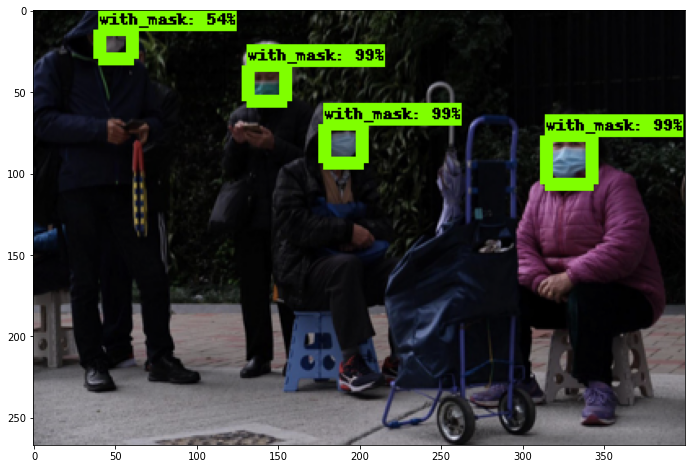

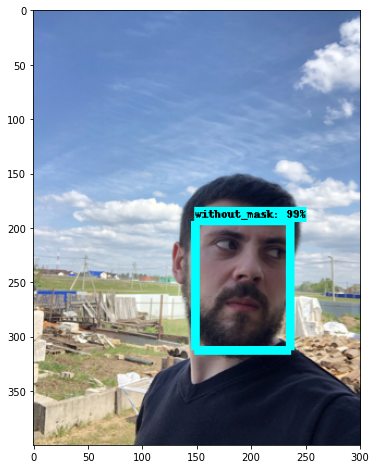

In [ ]:

%matplotlib inline
for image_path in TEST_IMAGE_PATHS:
  
  image = Image.open(image_path)
  
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)